<a href="https://colab.research.google.com/github/naranjitoct/UPCT_IA_2022/blob/main/01_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LINEAR REGRESION


https://www.kaggle.com/code/bayunova/steel-industry-energy-consumption

In [2]:
# TODO: REVISAR LAS LIBRERIAS 

#import library
import matplotlib as mpl
import seaborn as sns
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/IA2022/00_TrabajoIA/LR/Steel_industry_data.csv')


In [5]:
df.shape

(35040, 11)

Let's study Electricity again... ( https://www.tutorialspoint.com/difference-between-leading-and-lagging-power-factor )

Leading- Inductives
Lagging - Capacitives


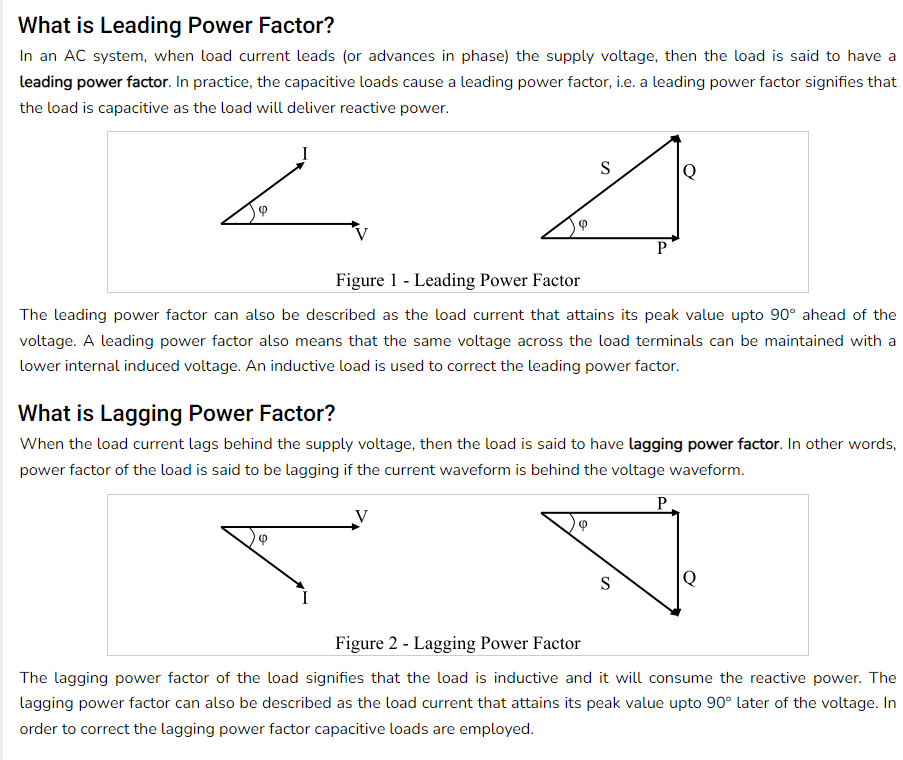

To comment about the coluns
NSM = Number of Seconds from midnight

In [6]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [ ]:
print('-----Not a number----\n')
print(df.isna().sum())
print('\n-----null ----\n')
print(df.isnull().sum())

In [11]:
df.info() # to highlight Lagging_Current_Reactive.Power_kVarh uses '.' instead of '_' --- Rest of data seems normal data. Not too much DW is foreseen.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [12]:
print('-----Column WeekStatus ----\n') ## Weekday & Weekend     
print(df['WeekStatus'].value_counts())

print('\n-----Column Day_of_week ----\n')  # 7 days of the week
print(df['Day_of_week'].value_counts())

print('\n-----Column Load_Type ----\n') # 3 different troughput
print(df['Load_Type'].value_counts())

-----Column WeekStatus ----

Weekday    25056
Weekend     9984
Name: WeekStatus, dtype: int64

-----Column Day_of_week ----

Monday       5088
Tuesday      4992
Wednesday    4992
Thursday     4992
Friday       4992
Saturday     4992
Sunday       4992
Name: Day_of_week, dtype: int64

-----Column Load_Type ----

Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: Load_Type, dtype: int64


In [13]:
df.describe() #our y will be Usage_kwh

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


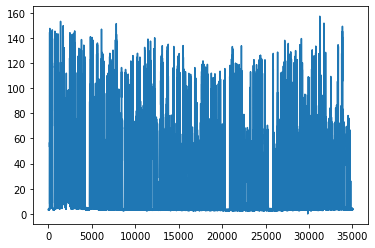

In [14]:
plt.plot(df['Usage_kWh'])

In [23]:
df=pd.read_csv('/content/drive/MyDrive/IA2022/00_TrabajoIA/LR/Steel_industry_data.csv')
df.head(1)
df[df['NSM']==1800]

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
97,02/01/2018 00:30,3.85,4.61,0.00,0.0,64.10,100.00,1800,Weekday,Tuesday,Light_Load
193,03/01/2018 00:30,4.61,4.54,0.00,0.0,71.25,100.00,1800,Weekday,Wednesday,Light_Load
289,04/01/2018 00:30,4.64,4.57,0.00,0.0,71.25,100.00,1800,Weekday,Thursday,Light_Load
385,05/01/2018 00:30,4.68,5.22,0.00,0.0,66.75,100.00,1800,Weekday,Friday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
34561,27/12/2018 00:30,3.74,2.99,0.22,0.0,78.11,99.83,1800,Weekday,Thursday,Light_Load
34657,28/12/2018 00:30,3.78,2.34,0.50,0.0,85.03,99.14,1800,Weekday,Friday,Light_Load
34753,29/12/2018 00:30,4.82,2.77,0.00,0.0,86.70,100.00,1800,Weekend,Saturday,Light_Load
34849,30/12/2018 00:30,3.82,3.20,0.04,0.0,76.66,99.99,1800,Weekend,Sunday,Light_Load


In [27]:
#df_temp['date'] = pd.to_datetime(df_temp['date'], errors='coerce')
#df['date'] = pd.to_datetime(df['date']) ... WARNING:... data format...
df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y %H:%M")
df.head()
df[df['NSM']==1800]

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
1,2018-01-01 00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
97,2018-01-02 00:30:00,3.85,4.61,0.00,0.0,64.10,100.00,1800,Weekday,Tuesday,Light_Load
193,2018-01-03 00:30:00,4.61,4.54,0.00,0.0,71.25,100.00,1800,Weekday,Wednesday,Light_Load
289,2018-01-04 00:30:00,4.64,4.57,0.00,0.0,71.25,100.00,1800,Weekday,Thursday,Light_Load
385,2018-01-05 00:30:00,4.68,5.22,0.00,0.0,66.75,100.00,1800,Weekday,Friday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
34561,2018-12-27 00:30:00,3.74,2.99,0.22,0.0,78.11,99.83,1800,Weekday,Thursday,Light_Load
34657,2018-12-28 00:30:00,3.78,2.34,0.50,0.0,85.03,99.14,1800,Weekday,Friday,Light_Load
34753,2018-12-29 00:30:00,4.82,2.77,0.00,0.0,86.70,100.00,1800,Weekend,Saturday,Light_Load
34849,2018-12-30 00:30:00,3.82,3.20,0.04,0.0,76.66,99.99,1800,Weekend,Sunday,Light_Load


In [28]:
df['Weekday'] = pd.factorize(df['date'].dt.day_of_week)[0] + 1
df[df['NSM']==1800]

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Weekday
1,2018-01-01 00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load,1
97,2018-01-02 00:30:00,3.85,4.61,0.00,0.0,64.10,100.00,1800,Weekday,Tuesday,Light_Load,2
193,2018-01-03 00:30:00,4.61,4.54,0.00,0.0,71.25,100.00,1800,Weekday,Wednesday,Light_Load,3
289,2018-01-04 00:30:00,4.64,4.57,0.00,0.0,71.25,100.00,1800,Weekday,Thursday,Light_Load,4
385,2018-01-05 00:30:00,4.68,5.22,0.00,0.0,66.75,100.00,1800,Weekday,Friday,Light_Load,5
...,...,...,...,...,...,...,...,...,...,...,...,...
34561,2018-12-27 00:30:00,3.74,2.99,0.22,0.0,78.11,99.83,1800,Weekday,Thursday,Light_Load,4
34657,2018-12-28 00:30:00,3.78,2.34,0.50,0.0,85.03,99.14,1800,Weekday,Friday,Light_Load,5
34753,2018-12-29 00:30:00,4.82,2.77,0.00,0.0,86.70,100.00,1800,Weekend,Saturday,Light_Load,6
34849,2018-12-30 00:30:00,3.82,3.20,0.04,0.0,76.66,99.99,1800,Weekend,Sunday,Light_Load,7


In [66]:
df['Month'] = pd.factorize(df['date'].dt.month)[0] + 1
df[df['NSM']==1800]

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Weekday,Load_Type_num,Month
1,2018-01-01 00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load,1,1,1
97,2018-01-02 00:30:00,3.85,4.61,0.00,0.0,64.10,100.00,1800,Weekday,Tuesday,Light_Load,2,1,1
193,2018-01-03 00:30:00,4.61,4.54,0.00,0.0,71.25,100.00,1800,Weekday,Wednesday,Light_Load,3,1,1
289,2018-01-04 00:30:00,4.64,4.57,0.00,0.0,71.25,100.00,1800,Weekday,Thursday,Light_Load,4,1,1
385,2018-01-05 00:30:00,4.68,5.22,0.00,0.0,66.75,100.00,1800,Weekday,Friday,Light_Load,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34561,2018-12-27 00:30:00,3.74,2.99,0.22,0.0,78.11,99.83,1800,Weekday,Thursday,Light_Load,4,1,12
34657,2018-12-28 00:30:00,3.78,2.34,0.50,0.0,85.03,99.14,1800,Weekday,Friday,Light_Load,5,1,12
34753,2018-12-29 00:30:00,4.82,2.77,0.00,0.0,86.70,100.00,1800,Weekend,Saturday,Light_Load,6,1,12
34849,2018-12-30 00:30:00,3.82,3.20,0.04,0.0,76.66,99.99,1800,Weekend,Sunday,Light_Load,7,1,12


In [31]:
dictionary_load={'Light_Load':1,
                 'Medium_Load':2,
                 'Maximum_Load':3}
df['Load_Type_num']=df.Load_Type.map(dictionary_load)
df[df['NSM']==1800]

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Weekday,Load_Type_num
1,2018-01-01 00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load,1,1
97,2018-01-02 00:30:00,3.85,4.61,0.00,0.0,64.10,100.00,1800,Weekday,Tuesday,Light_Load,2,1
193,2018-01-03 00:30:00,4.61,4.54,0.00,0.0,71.25,100.00,1800,Weekday,Wednesday,Light_Load,3,1
289,2018-01-04 00:30:00,4.64,4.57,0.00,0.0,71.25,100.00,1800,Weekday,Thursday,Light_Load,4,1
385,2018-01-05 00:30:00,4.68,5.22,0.00,0.0,66.75,100.00,1800,Weekday,Friday,Light_Load,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34561,2018-12-27 00:30:00,3.74,2.99,0.22,0.0,78.11,99.83,1800,Weekday,Thursday,Light_Load,4,1
34657,2018-12-28 00:30:00,3.78,2.34,0.50,0.0,85.03,99.14,1800,Weekday,Friday,Light_Load,5,1
34753,2018-12-29 00:30:00,4.82,2.77,0.00,0.0,86.70,100.00,1800,Weekend,Saturday,Light_Load,6,1
34849,2018-12-30 00:30:00,3.82,3.20,0.04,0.0,76.66,99.99,1800,Weekend,Sunday,Light_Load,7,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37f6231c10>,
      dtype=object)

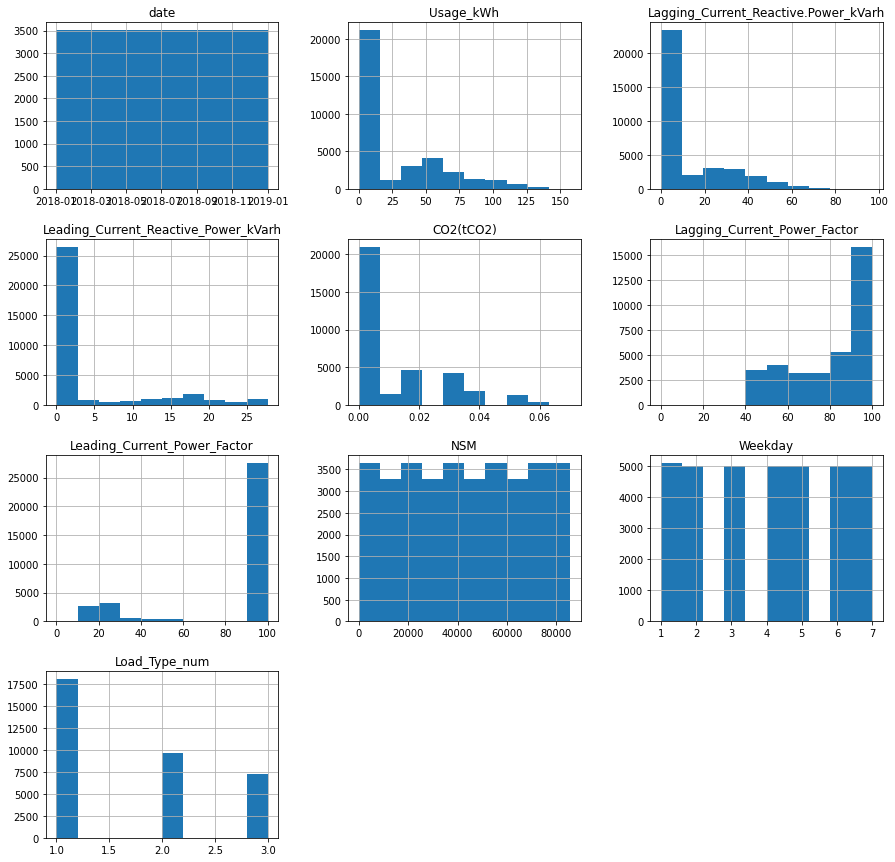

In [53]:
df.hist(figsize = (15,15))

In [89]:
fig = px.scatter(df.query("Month>10"), x="NSM", y="Usage_kWh",
	          size='Weekday',color="Load_Type_num",
                 hover_name="Load_Type", log_x=False, size_max=20)
fig.show()

In [78]:
fig = px.scatter(df.query("Month>0 & Month<3"), x="NSM", y="Usage_kWh",
	          size='Weekday',color="Load_Type_num",
                 hover_name="Load_Type", log_x=False, size_max=20)
fig.show()

In [88]:
fig = px.scatter(df.query("Month>2 & Month<11"), x="NSM", y="Usage_kWh",
	          size='Weekday',color="Load_Type_num",
                 hover_name="Load_Type", log_x=False, size_max=20)
fig.show()

In [90]:
fig = px.scatter_3d(df, x='NSM', y='Usage_kWh', z='Month',
              color='Load_Type_num', size='Load_Type_num',size_max=15)
fig.show()